In [ ]:
# %ls
%cd drive/MyDrive/Colab Notebooks/Attendance_System/Person_1
%ls

/content/drive/MyDrive/Colab Notebooks/Attendance_System/Person_1
 Dataset/               'Person 1.gdoc'   Person_2.ipynb
 person1_best_model.h5   Person_1.ipynb   saved_model/


In [ ]:
# # Rename Folder name and put serial number
# import os

# # Specify the folder path containing the files
# folder_path = 'Dataset/'


# nameList = ["Emily", "Benjamin", "Sophia", "Alexander", "Olivia", "William", "Ava", "James", "Mia", "Ethan"]

# # Get a list of all files in the folder
# files = os.listdir(folder_path)

# # Sort the files alphabetically
# files.sort()

# # Rename the files with sequential numbers
# for i, file_name in enumerate(files):
#     # Generate the new file name
#     new_file_name = nameList[i]

#     # Generate the current and new file paths
#     current_path = os.path.join(folder_path, file_name)
#     new_path = os.path.join(folder_path, new_file_name)

#     # Rename the file
#     os.rename(current_path, new_path)

# print("Files renamed successfully!")


Files renamed successfully!


In [ ]:
from sklearn.model_selection import train_test_split
import os
import shutil
from tqdm import tqdm

# Define the path to your dataset directory containing 10 folders
dataset_dir = 'Dataset/Input'

# Define the path for the output directory
output_dir = 'Dataset/Output'

# Define the ratio for train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Create directories for train, validation, and test sets
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'validation')
test_dir = os.path.join(output_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over the folders in the dataset directory
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)

    # Split the data in each folder into train and temp sets
    folder_train_data, folder_temp_data = train_test_split(os.listdir(folder_path), test_size=(1 - train_ratio))

    # Split the temp data into validation and test sets
    folder_val_data, folder_test_data = train_test_split(folder_temp_data, test_size=test_ratio / (test_ratio + val_ratio))

    # Create subdirectories within train, validation, and test directories based on folder names
    train_subdir = os.path.join(train_dir, folder_name)
    val_subdir = os.path.join(val_dir, folder_name)
    test_subdir = os.path.join(test_dir, folder_name)

    os.makedirs(train_subdir, exist_ok=True)
    os.makedirs(val_subdir, exist_ok=True)
    os.makedirs(test_subdir, exist_ok=True)

    # Move images to respective directories
    for image_file in folder_train_data:
        src_path = os.path.join(folder_path, image_file)
        dest_path = os.path.join(train_subdir, image_file)
        shutil.copy(src_path, dest_path)

    for image_file in folder_val_data:
        src_path = os.path.join(folder_path, image_file)
        dest_path = os.path.join(val_subdir, image_file)
        shutil.copy(src_path, dest_path)

    for image_file in folder_test_data:
        src_path = os.path.join(folder_path, image_file)
        dest_path = os.path.join(test_subdir, image_file)
        shutil.copy(src_path, dest_path)

print("Data split and saved successfully!")


Data split and saved successfully!


In [ ]:
%ls

 Dataset/  'Person 1.gdoc'   Person_1.ipynb


In [ ]:
import os
import random
import numpy as np
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
np.random.seed(42)

# Define input directory
input_directory = "Dataset/Input/"

# Load the image paths
image_paths = []
for person_folder in os.listdir(input_directory):
    person_folder_path = os.path.join(input_directory, person_folder)
    if os.path.isdir(person_folder_path):
        person_images = [os.path.join(person_folder_path, image) for image in os.listdir(person_folder_path)]
        image_paths.extend(person_images)

# Split the image paths into train, validation, and test sets
train_paths, val_paths = train_test_split(image_paths, test_size=0.3, random_state=42)
val_paths, test_paths = train_test_split(val_paths, test_size=0.5, random_state=42)

# Print the number of images in each set
print("Number of training images:", len(train_paths))
print("Number of validation images:", len(val_paths))
print("Number of test images:", len(test_paths))

print("Number of training images:", train_paths)



Number of training images: 140
Number of validation images: 30
Number of test images: 30
Number of training images: ['Dataset/Input/Mia/augmented_9.jpg', 'Dataset/Input/Olivia/augmented_18.jpg', 'Dataset/Input/Benjamin/augmented_11.jpg', 'Dataset/Input/Emily/augmented_13.jpg', 'Dataset/Input/Benjamin/augmented_15.jpg', 'Dataset/Input/William/augmented_19.jpg', 'Dataset/Input/Sophia/augmented_2.jpg', 'Dataset/Input/Ethan/augmented_9.jpg', 'Dataset/Input/Olivia/augmented_8.jpg', 'Dataset/Input/Ava/augmented_16.jpg', 'Dataset/Input/Sophia/augmented_11.jpg', 'Dataset/Input/Ava/augmented_8.jpg', 'Dataset/Input/Mia/augmented_5.jpg', 'Dataset/Input/Sophia/augmented_1.jpg', 'Dataset/Input/William/augmented_18.jpg', 'Dataset/Input/William/augmented_13.jpg', 'Dataset/Input/Benjamin/augmented_6.jpg', 'Dataset/Input/Ava/augmented_19.jpg', 'Dataset/Input/William/augmented_0.jpg', 'Dataset/Input/William/augmented_11.jpg', 'Dataset/Input/Emily/augmented_7.jpg', 'Dataset/Input/Alexander/augmented_16.j

In [ ]:
# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32


In [ ]:
train_labels = []
val_labels = []
test_labels = []

for path in train_paths:
  t_label = path.split('/')[2];
  train_labels.append(t_label)

for path in val_paths:
  v_label = path.split('/')[2];
  val_labels.append(v_label)

for path in test_paths:
  te_label = path.split('/')[2];
  test_labels.append(te_label)

In [ ]:
import pandas as pd

# Create a DataFrame with image paths and their corresponding labels
train_df = pd.DataFrame({'path': train_paths, 'label': train_labels})  # Replace train_labels with your actual labels
val_df = pd.DataFrame({'path': val_paths, 'label': val_labels})  # Replace val_labels with your actual labels
test_df = pd.DataFrame({'path': test_paths, 'label': test_labels})  # Replace val_labels with your actual labels

# Data augmentation for the training set
train_generator = train_datagen.flow_from_dataframe(train_df, x_col='path', y_col='label',
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical',
                                                    subset='training')

# Data augmentation for the validation set
val_generator = val_datagen.flow_from_dataframe(val_df, x_col='path', y_col='label',
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size, class_mode='categorical')

# Data augmentation for the validation set
test_generator = test_datagen.flow_from_dataframe(test_df, x_col='path', y_col='label',
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size, class_mode='categorical')

Found 140 validated image filenames belonging to 10 classes.
Found 30 validated image filenames belonging to 10 classes.
Found 30 validated image filenames belonging to 10 classes.


In [ ]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
# Define the path to save the best model
checkpoint_path = 'saved_model/person1_best_model.h5'

# Create a model checkpoint callback
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=1)

# Train the model with the callback
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[checkpoint_callback])

Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 2.4863 - accuracy: 0.0857
Epoch 1: val_loss improved from inf to 2.28546, saving model to best_model.h5
5/5 [==============================] - 14s 2s/step - loss: 2.4863 - accuracy: 0.0857 - val_loss: 2.2855 - val_accuracy: 0.0750
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 2.2440 - accuracy: 0.1357
Epoch 2: val_loss improved from 2.28546 to 2.26886, saving model to best_model.h5
5/5 [==============================] - 11s 2s/step - loss: 2.2440 - accuracy: 0.1357 - val_loss: 2.2689 - val_accuracy: 0.1000
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 2.1111 - accuracy: 0.2786
Epoch 3: val_loss improved from 2.26886 to 2.08350, saving model to best_model.h5
5/5 [==============================] - 12s 2s/step - loss: 2.1111 - accuracy: 0.2786 - val_loss: 2.0835 - val_accuracy: 0.2250
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 1.7838 - accuracy: 0.3857
Epoch 4: 

In [ ]:
import pandas as pd

df = pd.DataFrame(history.history)

df.insert(0,"epochs",[1,2,3,4,5,6,7,8,9,10], True)
df


,epochs,loss,accuracy,val_loss,val_accuracy
0,1,2.486253,0.085714,2.285462,0.075
1,2,2.243969,0.135714,2.268862,0.100
2,3,2.111149,0.278571,2.083505,0.225
3,4,1.783834,0.385714,1.730729,0.400
4,5,1.299499,0.571429,1.333512,0.575
5,6,0.958483,0.692857,1.138450,0.550
6,7,0.793210,0.692857,0.915230,0.700
7,8,0.577907,0.807143,0.977184,0.625
8,9,0.748534,0.707143,0.682721,0.825
9,10,0.499652,0.814286,0.801890,0.700


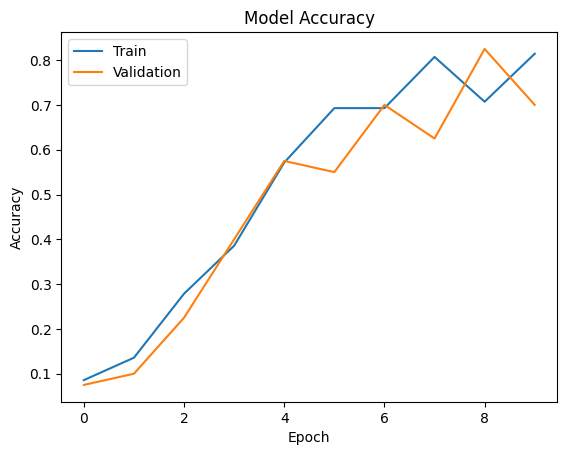

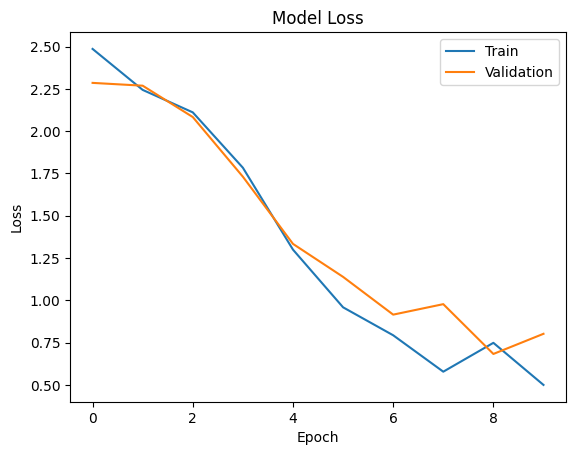

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Load the saved best model
saved_model = load_model('person1_best_model.h5')

# Define test data augmentation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Get the true labels for the test set
print(test_labels)

test_df = pd.DataFrame({'path': test_paths, 'label': test_labels})  # Replace val_labels with your actual labels


['Olivia', 'William', 'Ava', 'Ethan', 'Alexander', 'William', 'Alexander', 'James', 'Mia', 'Olivia', 'Benjamin', 'William', 'Emily', 'James', 'Emily', 'James', 'Mia', 'Alexander', 'Alexander', 'Ava', 'Benjamin', 'Alexander', 'James', 'Mia', 'Alexander', 'James', 'Mia', 'Alexander', 'Sophia', 'Emily']


In [ ]:

# Data augmentation for the validation set
test_generator = test_datagen.flow_from_dataframe(test_df, x_col='path', y_col='label',
                                                 target_size=(img_width, img_height),
                                                 batch_size=batch_size, class_mode='categorical')

print(test_generator.classes)

Found 30 validated image filenames belonging to 10 classes.
[7, 9, 1, 4, 0, 9, 0, 5, 6, 7, 2, 9, 3, 5, 3, 5, 6, 0, 0, 1, 2, 0, 5, 6, 0, 5, 6, 0, 8, 3]


In [ ]:

test_predictions = saved_model.predict(test_generator)
# print(test_predictions)

# Evaluate the model
test_loss, test_accuracy = saved_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


1/1 [==============================] - 1s 1s/step
[[9.94122088e-01 3.84205603e-04 8.69885203e-04 1.75055509e-04
  4.01165657e-04 2.79343453e-07 3.16482241e-04 3.72200040e-03
  1.96917244e-06 6.73970681e-06]
 [5.89162996e-03 5.54107547e-01 5.99380815e-04 1.21822245e-01
  1.32328132e-03 3.74931442e-05 2.98495113e-04 1.02814389e-02
  3.30439443e-03 3.02334160e-01]
 [8.37817439e-04 7.49539686e-05 2.35157227e-03 8.49846052e-04
  8.24927092e-01 1.16004020e-01 3.26771475e-02 2.15017740e-02
  4.00450081e-04 3.75205767e-04]
 [4.97910078e-04 8.06943297e-01 1.02379665e-04 2.31180396e-02
  1.06566491e-04 1.54262689e-05 1.77164809e-04 1.09564303e-03
  8.81461799e-03 1.59128949e-01]
 [9.73846376e-01 4.45216458e-04 2.15293746e-02 8.53186648e-04
  4.30691172e-04 8.73090755e-07 1.78862043e-04 2.67196260e-03
  1.11629824e-05 3.22581254e-05]
 [7.54210532e-01 8.31671432e-03 1.94571152e-01 2.53375643e-03
  5.30550629e-03 5.87711111e-06 4.52802144e-03 3.04150973e-02
  5.13363921e-05 6.20263454e-05]
 [3.7857

In [ ]:
answer = np.argmax(test_predictions, axis=1) # , axis=1
print(answer)

y_true = test_generator.classes

[0 1 4 1 0 0 4 9 4 5 6 9 4 1 5 8 6 9 1 0 0 2 5 1 0 5 0 5 7 2]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.29      0.29      0.29         7
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.40      0.40      0.40         5
           6       0.50      0.25      0.33         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.33      0.33      0.33         3

    accuracy                           0.20        30
   macro avg       0.15      0.13      0.14        30
weighted avg       0.23      0.20      0.21        30

******************


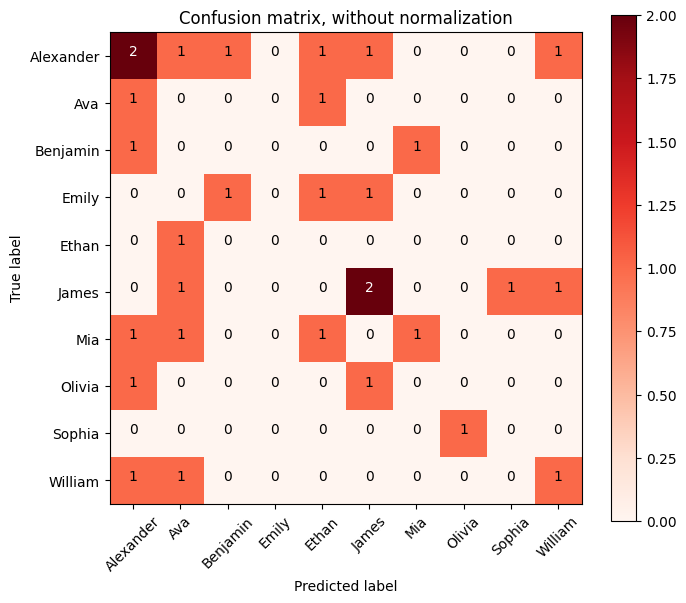

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf_mat = confusion_matrix(y_true, answer)
# print(conf_mat)
clas_report = classification_report(y_true, answer)
print(clas_report)

print('******************')

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

np.set_printoptions(precision=2)
classes = test_generator.class_indices

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

In [ ]:
students_list = list(test_generator.class_indices)
print(students_list)

['Alexander', 'Ava', 'Benjamin', 'Emily', 'Ethan', 'James', 'Mia', 'Olivia', 'Sophia', 'William']


In [ ]:
import numpy as np

In [ ]:
# Test with given image
student_list = ['Alexander', 'Ava', 'Benjamin', 'Emily', 'Ethan', 'James', 'Mia', 'Olivia', 'Sophia', 'William']
labels_num = student_list.index

print(np.numpy_function)

<function list.index(value, start=0, stop=9223372036854775807, /)>

WebCamera based attendance

<IPython.core.display.Javascript object>

In [ ]:
# Webcam

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [ ]:
%cd drive/MyDrive/Colab Notebooks/Attendance_System/Rupendra
%ls

/content/drive/MyDrive/Colab Notebooks/Attendance_System/Rupendra
 2023_June.xlsx   person1_best_model.h5   Person_1.ipynb
 Dataset/        'Person 1.gdoc'          photo.jpg


In [ ]:
# prediction from saved file
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model


class ImageClassifier:
    def __init__(self, img_width, img_height):
        self.img_width = img_width
        self.img_height = img_height
        # self.batch_size = 32
        self.model = None
        self.checkpoint_path = 'person1_best_model.h5'

    def load_saved_model(self):
        self.model = load_model(self.checkpoint_path)

    def preprocess_image(self, image_path):
        image = load_img(image_path, target_size=(self.img_width, self.img_height))
        image = img_to_array(image) / 255.0
        image = np.expand_dims(image, axis=0)
        return image

    def predict_image(self, image_path):
        if self.model is None:
            print("Error: Model not loaded.")
            return

        image = self.preprocess_image(image_path)
        predictions = self.model.predict(image)
        class_index = np.argmax(predictions[0])
        return class_index



In [ ]:
import datetime
import pandas as pd

def build_excel(year, month, day, time):
  # Check if the file exists
  excel_file = year+'_'+month+'.xlsx'  # file name
  if not os.path.exists(excel_file):
      student = ['Alexander', 'Ava', 'Benjamin', 'Emily', 'Ethan', 'James', 'Mia', 'Rupendra', 'Sophia', 'William']
      rollNo = []
      rollNo = [num+1 for num in range(len(student))]
      print(rollNo)

      df = pd.DataFrame(columns=['Roll No', 'Name'])
      df['Roll No'] = rollNo
      df['Name'] = student
      df.to_excel(excel_file, index=False)
      print(f"Excel file '{excel_file}' created successfully.")
  else:
      df = pd.read_excel(excel_file)
      # Check if the current day column exists
      if day not in df.columns:
        # Add a new column with the current day
        df[day] = day
        df.to_excel(excel_file, index=False)
        print(f"New column '{day}' added to the Excel file.")
      else:
        print(f"Excel file '{excel_file}' already contains column '{day}'.")

      print(f"Excel file '{excel_file}' already exists.")

  return excel_file



In [ ]:
# Do attendance

def add_attendance_to_excel(rollno, name):
    # Get the current UTC time
    utc_time = datetime.datetime.utcnow()

    # Calculate the time difference for Nepal (+5:45)
    nepal_time_difference = datetime.timedelta(hours=5, minutes=45)

    # Add the time difference to the current UTC time
    nepal_time = utc_time + nepal_time_difference

    # Get the current date and time
    time = nepal_time.strftime("%H:%M:%S")
    year = nepal_time.strftime("%Y")
    month = nepal_time.strftime("%B")
    day = nepal_time.strftime("%d")

    file_name = build_excel(year, month, day, time)  # Add excel by calling build_excel function
    print(file_name)

    dataframe = pd.read_excel(file_name)
    rollno_mask = (dataframe['Roll No'] == rollno)
    if rollno_mask.any():
        rollno_row = dataframe.loc[rollno_mask]
        if pd.isnull(rollno_row[day].iloc[0]):
            # Add recognized time to the specified column and row
            dataframe.loc[rollno_mask, day] = time

            # Save the modified DataFrame back to the Excel file
            dataframe.to_excel(file_name, index=False)
            print("Attendance for Roll No. {} and Name: {} added.".format(rollno, name))
        else:
            print("Roll No. {} and Name: {} Attendance already registered.".format(rollno, name))
    else:
        print("Roll No. {} not found in the Excel file.".format(rollno))

    return "Attendance for Roll No. {} and Name: {} not added.".format(rollno, name)


<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg
1/1 [==============================] - 0s 377ms/step
Predicted class index: 2
Benjamin is present
New column '23' added to the Excel file.
Excel file '2023_June.xlsx' already exists.
2023_June.xlsx
Roll No. 3 and Name: Benjamin Attendance already registered.


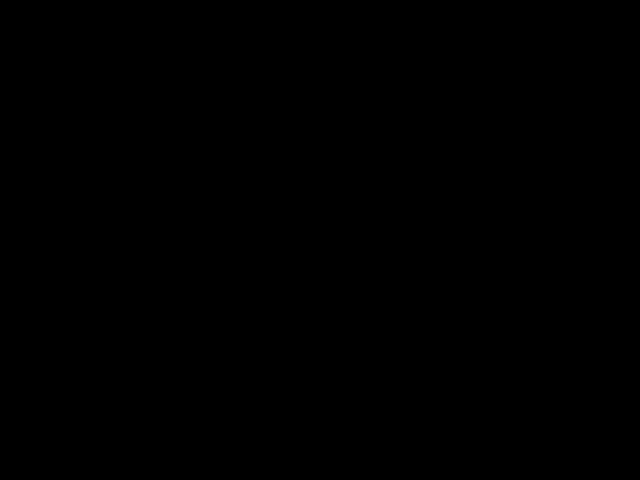

In [ ]:
try:
    filename = take_photo('photo.jpg')
    print('Saved to {}'.format(filename))

    img_width = img_height = 150

    # Create ImageClassifier instance
    classifier = ImageClassifier(img_width, img_height)

    # Load the saved model
    classifier.load_saved_model()

    # Make a prediction using the saved model
    prediction = classifier.predict_image(filename)

    # Print the predicted class index
    print("Predicted class index:", prediction)
    studentName = ['Alexander', 'Ava', 'Benjamin', 'Emily', 'Ethan', 'James', 'Mia', 'Rupendra', 'Sophia', 'William']
    print(studentName[prediction], "is present")

    # For model
    name = studentName[prediction]  # Predicted student name
    add_attendance_to_excel(prediction+1, name)   # Call add_attendance_to_excel to register attendance of person

    # Show the image which was just taken.
    display(Image(filename))

except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))